<a href="https://colab.research.google.com/github/dharaneeshgunturu2003/sentimental-Analysis/blob/main/Copy_of_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Sentimental Analysis**

We have taken data from twitter by using a package called `snscrape`.  It scrapes things like user profiles, hashtags, or searches and returns the discovered items, e.g. the relevant posts.
And we stored that unstructured data into `csv` file `named tweet_Updated.csv` using pandas library.

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
import re
from textblob import TextBlob
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# creating a dataframe
df = pd.read_csv('/content/tweetUpdated.csv')
df

,Unnamed: 0,Tweet
0,0,@Harmindarboxoff #Agnipath\nSanjay Dutt totall...
1,1,"Shri @bhagwantkhuba, Union Minister of State o..."
2,2,@Rahul_ForPM @SupriyaShrinate @LambaAlka @srin...
3,3,This issue brief by @Gauravbhattarai and @Saro...
4,4,“Birds of War”\nTroops of #IndianArmy and \n@A...
...,...,...
4995,4995,@Itz_Gekko @AnshumanSail They r already out. A...
4996,4996,"This is not frustration , It's imotion for Arm..."
4997,4997,@EkJindgi The video is not bringing out anythi...
4998,4998,"Pre-Recruitment Training for the youth, who ha..."


In [ ]:
# removing unwanted column unnamed: 0
df = df.drop(['Unnamed: 0'], axis=1)
df

,Tweet
0,@Harmindarboxoff #Agnipath\nSanjay Dutt totall...
1,"Shri @bhagwantkhuba, Union Minister of State o..."
2,@Rahul_ForPM @SupriyaShrinate @LambaAlka @srin...
3,This issue brief by @Gauravbhattarai and @Saro...
4,“Birds of War”\nTroops of #IndianArmy and \n@A...
...,...
4995,@Itz_Gekko @AnshumanSail They r already out. A...
4996,"This is not frustration , It's imotion for Arm..."
4997,@EkJindgi The video is not bringing out anythi...
4998,"Pre-Recruitment Training for the youth, who ha..."


In [ ]:
# cleaning the text data
stop_words = set(stopwords.words('english'))
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+' ,'' ,text) # removes @tags
  text = re.sub(r'#' ,'' ,text) #removes # symbol
  text = re.sub(r'RT[\s]+' ,'' ,text) #removes RT
  text = re.sub(r'https?:\/\/\S+' ,'' ,text) #removes hyper link
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # removing punctuations
  # stopword removal
  text = text.lower() 
  tokens = word_tokenize(text)
  filtered_tokens = [i for i in tokens if not i in stop_words]
  return " ".join(filtered_tokens)


df['Tweet'] = df['Tweet'].apply(cleanText)
# removing duplicate data
df = df.drop_duplicates('Tweet')

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df['Tweet'] = df['Tweet'].apply(remove_emoji)

In [ ]:
df.shape

(3552, 1)

In [ ]:
# finding subjectivity and polarity for finding the target label
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
# df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
# df['Polarity'] = df['Tweet'].apply(getPolarity)
# df

In [ ]:
# creating a feature called target i.e., target field
# Create a function to compute the negative, neutral and positive analysis
def makeLabel(polarity):
  if(polarity==1):
    return "Neutral"
  elif(polarity<0):
    return "Negative"
  else:
    return "Positive"
# df['Target'] = df['Polarity'].apply(makeLabel)
# df


'''Here these funtions getSubjectivity,getPolarity and makeLabel are used for creating a target feature.
   So we can transformers to do the same.'''

'Here these funtions getSubjectivity,getPolarity and makeLabel are used for creating a target feature.\n   So we can transformers to do the same.'

In [ ]:
pip install transformers

In [ ]:
# we can also use directly tranformers to get sentiment of text
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

In [ ]:
def target_label(text):
  return sentiment_pipeline(text)[0]['label']

In [ ]:
tqdm_notebook.pandas()
df['Target'] = df['Tweet'].apply(target_label)

In [ ]:
df = pd.read_csv(r'/content/data.csv')
df = df.drop(['Unnamed: 0'],axis = 1)
df

,Tweet,Target
0,agnipath sanjay dutt totally overshawdowed hri...,NEGATIVE
1,shri union minister state chemicals amp fertil...,POSITIVE
2,forpm pyc youth bjp4ind agnipathscheme cancell...,NEGATIVE
3,issue brief discusses impacts agnipath scheme ...,POSITIVE
4,“ birds war ” troops indianarmy exchanged expe...,POSITIVE
...,...,...
3547,gekko r already r put see happens feku n follo...,NEGATIVE
3548,frustration imotion army uttrakhand one state ...,NEGATIVE
3549,video bringing anything however voice video al...,NEGATIVE
3550,prerecruitment training youth applied agnipath...,NEGATIVE


In [ ]:
# from google.colab import drive
# drive.mount('drive')

In [ ]:
# df.to_csv('data.csv')
# !cp data.csv "drive/My Drive/"

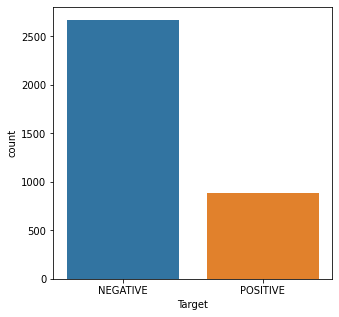

In [ ]:
# checking whether the data is balanced or not
plt.figure(figsize=(5,5))
sns.countplot(x='Target',data = df)

It is clear that our data is unbalanced.

In [ ]:
""" To build a sentiment analysis model using the BOW Vectorization Approach we need a labeled dataset.
    So made our data into a labelled data frame. Now we can apply Sentimental analysis on it through BOW Vectorization."""
vect = CountVectorizer(ngram_range=(1,3)).fit(df['Tweet']) 
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("first 20 features:\n {}".format(feature_names[:20]))

Number of features: 90493

first 20 features:
 ['0000', '0000 indian', '0000 indian army', '0000000000', '0000000000 10', '0000000000 10 zeros', '004', '004 overall', '004 overall 114', '01', '01 anuj', '01 anuj sir', '01 farha', '01 farha farha', '01 nov', '01 nov 2022', '01 nov come', '0100', '0100 stated', '0100 stated date']


In [ ]:
y = df['Target']
X = vect.transform(df.Tweet)
# y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
# splitting the data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (2664, 90493)
Number transactions y_train dataset:  (2664,)
Number transactions X_test dataset:  (888, 90493)
Number transactions y_test dataset:  (888,)


In [ ]:
#lets see top 5 tweets for each sentiment
pos_tweets = df[df.Target == 'POSITIVE']
pos_tweets.head()

,Tweet,Target
1,shri union minister state chemicals amp fertil...,POSITIVE
3,issue brief discusses impacts agnipath scheme ...,POSITIVE
4,“ birds war ” troops indianarmy exchanged expe...,POSITIVE
7,lesson bjp never betray ex servicemen country ...,POSITIVE
11,full support agnipathscheme bandkaro deshbachao,POSITIVE


(-0.5, 499.5, 299.5, -0.5)

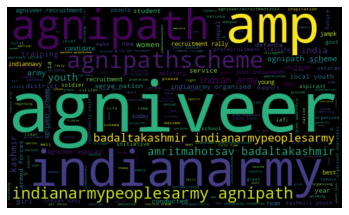

In [ ]:
# word cloud for positive tweets

allWords = ' '.join([twts for twts in pos_tweets['Tweet']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')

In [ ]:
#top 5 tweets in negative sentiment
neg_tweets = df[df.Target == 'NEGATIVE']
neg_tweets.head()

,Tweet,Target
0,agnipath sanjay dutt totally overshawdowed hri...,NEGATIVE
2,forpm pyc youth bjp4ind agnipathscheme cancell...,NEGATIVE
5,chinarwarriors along citizens amp civil dignit...,NEGATIVE
6,sahitya bhawan pratiyogita sahitya indian army...,NEGATIVE
8,bjp clever announced agnipath uttarakhand elec...,NEGATIVE


(-0.5, 499.5, 299.5, -0.5)

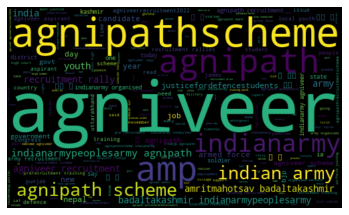

In [ ]:
# word cloud for negative tweets

allWords = ' '.join([twts for twts in neg_tweets['Tweet']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')

In [ ]:
# training the multinomial naive bayes model on the trainging data
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# training on logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 81.87%


In [ ]:
# predicting the result on test data
predicted = MNB.predict(X_test)
acc_score = accuracy_score(predicted, y_test)
print("Accuracuy Score: ",acc_score) # we got 72% accuracy on the unbalaced data.

Accuracuy Score:  0.661036036036036


In [ ]:
# since our data is unbalanced we did RandomOverSampling on the data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X1, y1 = ros.fit_resample(X, y)

In [ ]:
# splitting the data into training data and testing data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.25,random_state=1)
print("Number transactions X_train dataset: ", X1_train.shape)
print("Number transactions y_train dataset: ", y1_train.shape)
print("Number transactions X_test dataset: ", X1_test.shape)
print("Number transactions y_test dataset: ", y1_test.shape)

Number transactions X_train dataset:  (4005, 90493)
Number transactions y_train dataset:  (4005,)
Number transactions X_test dataset:  (1335, 90493)
Number transactions y_test dataset:  (1335,)


In [ ]:
model = MultinomialNB()
model.fit(X1_train, y1_train)
predicted = model.predict(X1_test)
acc_score = accuracy_score(predicted, y1_test)
print("Accuracy Score: ",acc_score)
# we got 86% accuracy on the unbalaced data after making it balanced using RandomOverSampling+


Accuracy Score:  0.8831460674157303


In [ ]:
# training on logistic regression model
logreg = LogisticRegression()
logreg.fit(X1_train,y1_train)
logreg_pred = logreg.predict(X1_test)
logreg_acc = accuracy_score(logreg_pred,y1_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 91.61%


## **Sentimental Analysis using Bert-model**

In [ ]:
# since our data is unbalanced we are performed text augmentation on the data
pos = len(df[df.Target=='POSITIVE'])
neg = len(df[df.Target=='NEGATIVE'])
lst = list(df[df.Target=='POSITIVE'].Tweet)
X = list(df.Tweet)
print(pos,neg)
print(X)

882 2670
['agnipath sanjay dutt totally overshawdowed hrithik', 'shri union minister state chemicals amp fertilizers new renewable energy witnessed ongoing agniveer recruitment rally bidar today exalted spirit youth toserve nation', 'forpm pyc youth bjp4ind agnipathscheme cancelling pending recruitments year 202021 justicefordefencestudents justicefordefencestudents', 'issue brief discusses impacts agnipath scheme military labour migration nepal india larger bilateral relationship two countries', '“ birds war ” troops indianarmy exchanged expertise employment cutting edge drone technology including nanodrones combat austrahind 2022 indiaaustraliafriendship indianarmypeoplesarmy exercise agnipathscheme agniveer', 'chinarwarriors along citizens amp civil dignitaries paid solemn homage uri war memorial 1st cds gen bipin rawat kashmir ia indianarmypeoplesarmy agnipath hamreveer veergati', 'sahitya bhawan pratiyogita sahitya indian army agniveer general duty book hindi includes model paper 

In [ ]:
!pip install textattack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 418 kB 35.4 MB/s 
     |████████████████████████████████| 401 kB 56.5 MB/s 
     |████████████████████████████████| 125 kB 75.1 MB/s 
     |████████████████████████████████| 60 kB 3.8 MB/s 
     |████████████████████████████████| 769 kB 64.1 MB/s 
     |████████████████████████████████| 41.4 MB 1.6 MB/s 
     |████████████████████████████████| 3.6 MB 57.5 MB/s 
     |████████████████████████████████| 365 kB 65.8 MB/s 
     |████████████████████████████████| 212 kB 79.0 MB/s 
     |████████████████████████████████| 95 kB 4.0 MB/s 
     |████████████████████████████████| 132 kB 70.5 MB/s 
     |████████████████████████████████| 127 kB 38.7 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 1.6 MB 64.7 MB/s 
     |████████████████████████████████| 1.2 MB 56.6 MB/s 
     |███████████████████████████████

In [ ]:
from textattack.augmentation import WordNetAugmenter
wordnet_aug = WordNetAugmenter()
# Wordnet augments text by replacing words with synonyms provided by WordNet

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#performing text augemntation on data
y = list(df.Target)
i = neg-pos
j = 0
while i>0:
  if j==pos-1:
    j = 0
  else:
    x = wordnet_aug.augment(lst[j])[0]
    X.append(x)
    y.append('POSITIVE')
    j+=1
  i-=1


In [ ]:
print(len(X),len(y))

5338 5338


In [ ]:
X # after text augmentation

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
!pip install tweet-preprocessor
import preprocessor as p

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=57)

In [ ]:
import torch

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Create a function to tokenize a set of texts
def preprocessing_for_bert(data):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=cleanText(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True      # Return attention mask
            )
        
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [ ]:
# Concatenate train data and test data
all_tweets = np.concatenate([X_train, X_test])

# Encode our concatenated data
encoded_tweets = [tokenizer.encode(sent, add_special_tokens=True) for sent in all_tweets]

# Find the maximum length
max_len = max([len(sent) for sent in encoded_tweets])
print('Max length: ', max_len)

Max length:  126


In [ ]:
# Specify `MAX_LEN`
MAX_LEN = 64

# Print sentence 0 and its encoded token ids
token_ids = list(preprocessing_for_bert([X[0]])[0].squeeze().numpy())
print('Original: ', X[0])
print('Token IDs: ', token_ids)

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_test)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Original:  agnipath sanjay dutt totally overshawdowed hrithik
Token IDs:  [101, 12943, 3490, 15069, 29590, 4241, 4779, 6135, 15849, 14238, 3527, 15557, 17850, 8939, 5480, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Tokenizing data...


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_test)

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

In [ ]:
%%time
import torch
import torch.nn as nn
from transformers import BertModel

# Create the BertClassfier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 70 µs, sys: 0 ns, total: 70 µs
Wall time: 77.7 µs


In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)
    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [ ]:
import random
import time

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [ ]:
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, train_dataloader, val_dataloader, epochs=2, evaluation=True)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.645007   |     -      |     -     |  355.98  
   1    |   40    |   0.512431   |     -      |     -     |  318.33  
   1    |   60    |   0.467763   |     -      |     -     |  315.99  
   1    |   80    |   0.422455   |     -      |     -     |  317.29  
   1    |   100   |   0.311936   |     -      |     -     |  312.64  
   1    |   120   |   0.339556   |     -      |     -     |  313.64  
   1    |   133   |   0.305005   |     -      |     -     |  196.26  
----------------------------------------------------------------------
   1    |    -    |   0.437262   |  0.291453  |   88.91   |  2291.46 
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
------------------------------------------------------------------

In [ ]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.9738
Accuracy: 91.48%


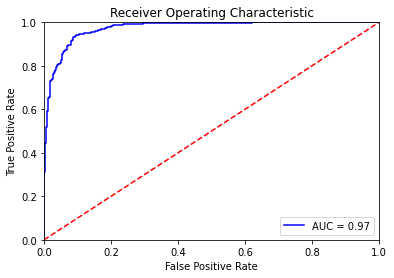

In [ ]:
probs = bert_predict(bert_classifier, val_dataloader)

# Evaluate the Bert classifier
evaluate_roc(probs, y_test)
 